<a href="https://colab.research.google.com/github/enakai00/cirq_examples/blob/master/QFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cirq をインストールします。

In [0]:
pip install cirq==0.7.0

必要なモジュールをインポートします。

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import cirq

フーリエ変換を愚直に実装します。

In [0]:
def fourier_transform(xs):
  n = len(xs)
  ys = np.zeros(n)
  for k in range(n):
    result = 0
    for j in range(n):
      result += xs[j] * np.exp(2*np.pi*(1.0j)*j*k/n)
    ys[k] = result / np.sqrt(n)
  return ys

def fourier_show(xs):
  ys = fourier_transform(xs)
  ys_r = list(map(lambda x: x.real, ys))

  fig = plt.figure(figsize=(7, 4))
  subplot = fig.add_subplot(1, 1, 1)
  index = np.arange(len(xs))
  subplot.scatter(index, xs, label='xs')
  subplot.scatter(index, ys_r, label='ys_r')
  subplot.set_xticks(index)
  subplot.legend()

周期 0 の例です。

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


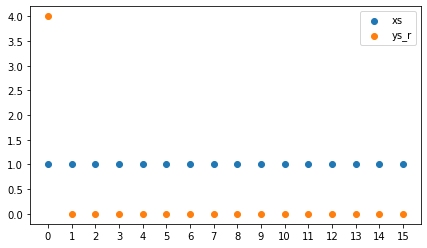

In [111]:
n = 16
xs = np.array([np.cos(0*np.pi*x/n) for x in range(n)]) 
fourier_show(xs)

周期 1 の例です。

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


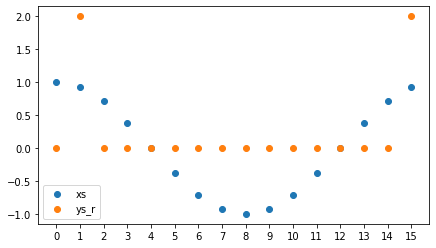

In [112]:
n = 16
xs = np.array([np.cos(2*np.pi*x/n) for x in range(n)]) 
fourier_show(xs)

周期 1/2 の例です。

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


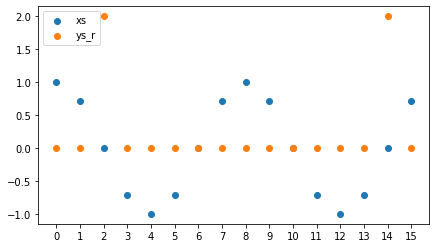

In [113]:
n = 16
xs = np.array([np.cos(4*np.pi*x/n) for x in range(n)]) 
fourier_show(xs)

周期 1 と周期 1/2 を合成した例です。

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


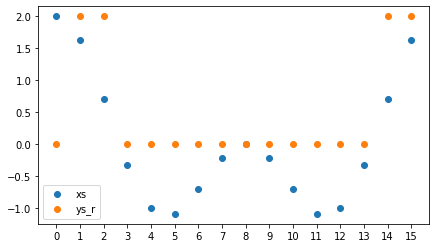

In [114]:
n = 16
xs = np.array([np.cos(2*np.pi*x/n) for x in range(n)])+ np.array([np.cos(4*np.pi*x/n) for x in range(n)])
fourier_show(xs)

フーリエ変換を量子回路で実装する例です。

In [0]:
class Qft(cirq.Gate):
    """Quantum gate for the Quantum Fourier Transformation
    """

    def __init__(self, num_qubits):
        super(Qft, self)
        self._num_qubits = num_qubits

    def num_qubits(self):
        return self._num_qubits

    def _decompose_(self, qubits):
        """A quantum circuit with the following structure
        (swaps at the end of the circuit are omitted.)
        ---H--@-------@--------@----------------------------------------------
              |       |        |
        ------@^0.5---+--------+---------H--@-------@-------------------------
                      |        |            |       |
        --------------@^0.25---+------------@^0.5---+---------H--@------------
                               |                    |            |
        -----------------------@^0.125--------------@^0.25-------@^0.5----H---
        The number of qubits can be arbitrary.
        """

        _qubits = list(qubits)
        while len(_qubits) > 0:
            q_head = _qubits.pop(0)
            yield cirq.H(q_head)
            for i, qubit in enumerate(_qubits):
                yield (cirq.CZ(qubit, q_head)**(1/2.0**(i+1)))

        _qubits = list(qubits)
        while len(_qubits) > 1:
            yield (cirq.SWAP(_qubits[0], _qubits[-1]))
            _qubits = _qubits[1:-1]

    def __str__(self):
        return 'QFT'

    def __repr__(self):
        return ('cirq.Qft(num_qubits={!r})'.format(self._num_qubits))

    def _circuit_diagram_info_(self, args: 'cirq.CircuitDiagramInfoArgs'):
        return cirq.CircuitDiagramInfo(
            wire_symbols=(str(self),) +
            tuple(f'#{k+1}' for k in range(1, self._num_qubits)),
            exponent_qubit_index=0)

すべての入力ビットにアダマール演算子を適用すると、すべての基底ベクトルの係数が同一になる「定数関数」が入力値となります。出力結果を見ると、最初の基底ベクトルだけが 1 になることがわかります。

In [116]:
qnum = 8
qubits = [None] * qnum
for i in range(len(qubits)):
    qubits[i] = cirq.GridQubit(0, i)

circuit = cirq.Circuit(
    cirq.H.on_each(*qubits),
    Qft(qnum)(*qubits))

print(circuit)

simulator = cirq.Simulator()
result = simulator.simulate(circuit)
print(np.around(result.final_state, 3))

(0, 0): ───H───QFT───
               │
(0, 1): ───H───#2────
               │
(0, 2): ───H───#3────
               │
(0, 3): ───H───#4────
               │
(0, 4): ───H───#5────
               │
(0, 5): ───H───#6────
               │
(0, 6): ───H───#7────
               │
(0, 7): ───H───#8────
[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j

周期 1/4 に相当する入力例をちょっとがんばって作ってみます。

In [117]:
qnum = 3
qubits = [None] * qnum
for i in range(len(qubits)):
    qubits[i] = cirq.GridQubit(0, i)

circuit = cirq.Circuit(
    cirq.X.on(qubits[2]),
    cirq.H.on_each(*qubits),
    )
simulator = cirq.Simulator()
result = simulator.simulate(circuit)
print('xs: ', np.around(result.final_state, 3))

circuit = cirq.Circuit(
    cirq.X.on(qubits[2]),
    cirq.H.on_each(*qubits),
    Qft(qnum)(*qubits)
    )
simulator = cirq.Simulator()
result = simulator.simulate(circuit)
print('ys: ', np.around(result.final_state, 3))

xs:  [ 0.354+0.j -0.354+0.j  0.354+0.j -0.354+0.j  0.354+0.j -0.354+0.j
  0.354+0.j -0.354+0.j]
ys:  [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j -0.+0.j -0.+0.j -0.+0.j]


愚直に実装したものと比較して、同じ結果が得られていることがわかります。

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


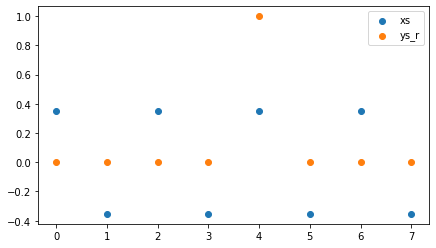

In [118]:
n = 8
xs = np.array([1,-1,1,-1,1,-1,1,-1]) / np.sqrt(n)
fourier_show(xs)